<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df= df.drop("customer_id",axis=1)

In [5]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
sns.set_style("whitegrid")

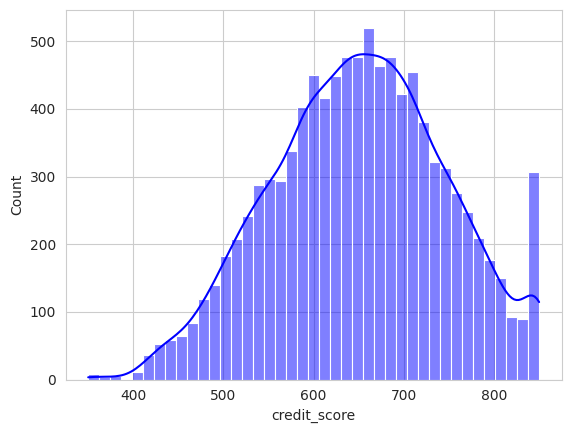

In [10]:
sns.histplot(data=df,x= "credit_score", kde=True,color="blue")
plt.show()

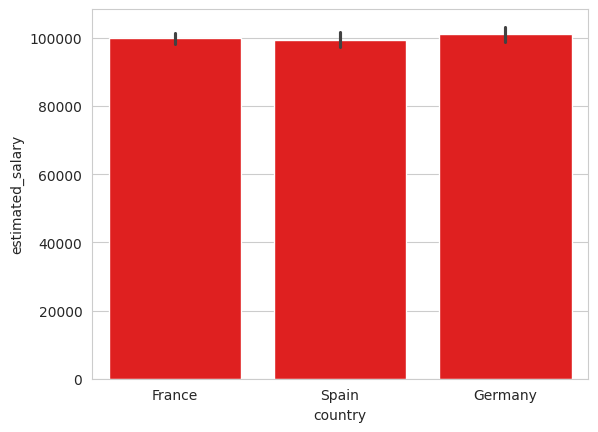

In [14]:
sns.barplot(data=df, x="country", y="estimated_salary", color="red")
plt.show()

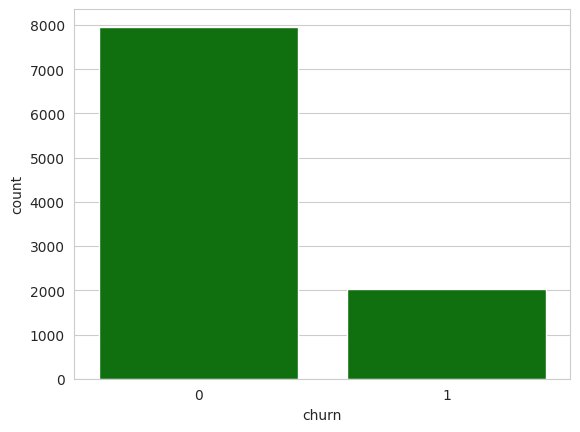

In [16]:
sns.countplot(data=df, x="churn", color="green")
plt.show()

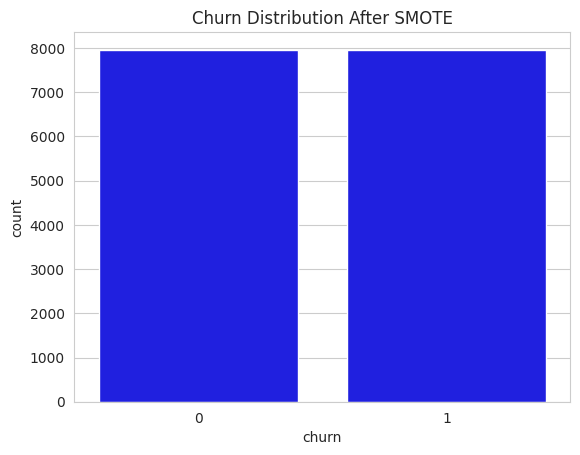

In [17]:
!pip install imblearn

# 1. Resampling Techniques (Oversampling the minority class or Undersampling the majority class)
# Example using imblearn (you might need to install it: !pip install imblearn)
from imblearn.over_sampling import SMOTE

# Assuming 'churn' is your target variable (0 for no churn, 1 for churn)
X = df.drop('churn', axis=1)
y = df['churn']

# Before applying SMOTE, you might need to handle categorical features.
# One-hot encode categorical features if necessary.
X = pd.get_dummies(X, columns=['country', 'gender'], drop_first=True) # Example for country and gender

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled represent the balanced dataset

# 2. Class Weights in Model Training
# Many machine learning models allow you to specify class weights.
# This gives more importance to the minority class during training.
# Example with a Logistic Regression model:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(class_weight='balanced')
# model.fit(X_train, y_train) # Assuming you have split your data into training sets

# 3. Use Evaluation Metrics Robust to Imbalance
# Instead of just accuracy, consider metrics like Precision, Recall, F1-score, or AUC.
# from sklearn.metrics import classification_report, roc_auc_score
# y_pred = model.predict(X_test) # Assuming you have a test set
# print(classification_report(y_test, y_pred))
# print("AUC:", roc_auc_score(y_test, y_pred))

# Choose the method that best suits your data and the specific problem you are trying to solve.
# Visualizing the distribution of the target variable after resampling can be helpful to confirm balancing.
sns.countplot(x=y_resampled, color="blue")
plt.title('Churn Distribution After SMOTE')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
LR= LogisticRegression()

In [22]:
LR.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred_LR= LR.predict(X_test)

In [25]:
cr= classification_report(y_test, y_pred_LR)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1633
           1       0.66      0.67      0.67      1553

    accuracy                           0.67      3186
   macro avg       0.67      0.67      0.67      3186
weighted avg       0.67      0.67      0.67      3186



In [26]:
roc= roc_auc_score(y_test, y_pred_LR)
print(roc)

0.6728324255564463


In [28]:

# 1. Feature Scaling: Tree-based models like Random Forest or Gradient Boosting
# are less sensitive to feature scaling, but models like Logistic Regression,
# SVMs, or models using distance metrics benefit significantly from scaling.
# Scaling numerical features (e.g., credit_score, age, tenure, balance, estimated_salary)
# can improve convergence and performance.
from sklearn.preprocessing import StandardScaler

numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
scaler = StandardScaler()

# Fit on the training data and transform both training and test data
# You should fit the scaler on the training data *before* resampling to avoid data leakage
# If you've already resampled and then split, fit on X_train_resampled
X_train_scaled = X_train.copy() # Create copies to avoid modifying original data
X_test_scaled = X_test.copy()

# Check if the numerical columns exist in the scaled dataframes before scaling
numerical_cols_in_train = [col for col in numerical_cols if col in X_train_scaled.columns]
numerical_cols_in_test = [col for col in numerical_cols if col in X_test_scaled.columns]

if numerical_cols_in_train:
    X_train_scaled[numerical_cols_in_train] = scaler.fit_transform(X_train_scaled[numerical_cols_in_train])

if numerical_cols_in_test:
    X_test_scaled[numerical_cols_in_test] = scaler.transform(X_test_scaled[numerical_cols_in_test])


# Now train the model on the scaled data
LR_scaled = LogisticRegression(max_iter=1000) # Increase max_iter for better convergence
LR_scaled.fit(X_train_scaled, y_train)
y_pred_LR_scaled = LR_scaled.predict(X_test_scaled)
cr_scaled = classification_report(y_test, y_pred_LR_scaled)
print("\nClassification Report after Scaling:")
print(cr_scaled)
roc_scaled = roc_auc_score(y_test, y_pred_LR_scaled)
print("AUC after Scaling:", roc_scaled)







Classification Report after Scaling:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1633
           1       0.76      0.76      0.76      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186

AUC after Scaling: 0.7704218254458017


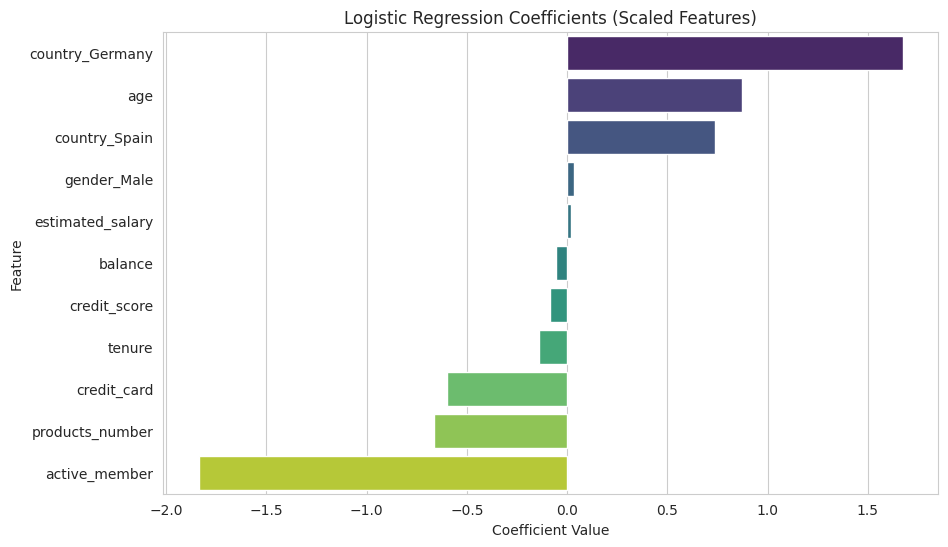

In [29]:
import matplotlib.pyplot as plt
# Visualizing the coefficients of the Logistic Regression model after scaling
# This can give insights into which features are most influential in predicting churn
coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': LR_scaled.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients (Scaled Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()